In [33]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [34]:
non_perturbed_deck = 'standard'
decks = [
    'batman_joker',
    'captain_america',
    'adversarial_standard',
    'adversarial_batman_joker',
    'adversarial_captain_america'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [35]:
def get_baseline_results(method, deck, data_size='small', unstructured=False, unstruc_acc='unstructured_test_accuracy'):
    if unstructured:
        struc_unstruc_acc = unstruc_acc
    else:
        struc_unstruc_acc = 'structured_test_accuracy'
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    np_0 = json.loads(open('../'+method+'/'+data_size+'/standard.json').read())
    acc.append(np_0['noise_pct_0'][struc_unstruc_acc]['mean'])
    acc_stds.append(np_0['noise_pct_0'][struc_unstruc_acc]['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../'+method+'/'+data_size+'/'+deck+'.json').read())
    np_res_extra = json.loads(open('../'+method+'/'+data_size+'/'+deck+'_extra.json').read())
    for n in noise_pcts:
        if n > 90 and method == "rf":
            acc.append(np_res_extra['noise_pct_'+str(n)][struc_unstruc_acc]['mean'])
            acc_stds.append(np_res_extra['noise_pct_'+str(n)][struc_unstruc_acc]['std_err'])  
        else:
            acc.append(np_res['noise_pct_'+str(n)][struc_unstruc_acc]['mean'])
            acc_stds.append(np_res['noise_pct_'+str(n)][struc_unstruc_acc]['std_err'])
    return acc, acc_stds

In [36]:
def get_nsl_results(net_type, deck, unstructured=False, unstruc_acc='accuracy', without_problog=False):
    if unstructured:
        struc_unstruc = 'unstructured_test_data'
        if without_problog:
            struc_unstruc = struc_unstruc+'/without_problog'
        acc_metric = unstruc_acc
    else:
        struc_unstruc = 'structured_test_data'
        acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    np_0 = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/standard.json').read())
    acc.append(np_0['noise_pct_0'][acc_metric]['mean'])
    acc_stds.append(np_0['noise_pct_0'][acc_metric]['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+deck+'.json').read())
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds


In [37]:
def get_credal_foil_results(deck, unstructured=False, unstruc_acc='accuracy'):
    if unstructured:
        struc_unstruc = 'unstructured_test_data'
        acc_metric = unstruc_acc
    else:
        struc_unstruc = 'structured_test_data'
        acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    # COMMENTING UNTIL STANDARD COMPLETES
#     np_0 = json.loads(open('../credal_foil/'+struc_unstruc+'/standard.json').read())
#     acc.append(np_0['noise_pct_0'][acc_metric]['mean'])
#     acc_stds.append(np_0['noise_pct_0'][acc_metric]['std_err'])
    acc.append(0)
    acc_stds.append(0)
    
    # other noise pcts
    np_res = json.loads(open('../credal_foil/'+struc_unstruc+'/'+deck+'.json').read())    
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds

In [38]:
def get_pct_symbolic_perturbs(net_type, deck, test_set=False):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    if test_set:
        file_name_add = '_test_set'
    else:
        file_name_add = ''
    std_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/standard'+file_name_add+'.json').read())
    pcts.append(format_pct(std_perturbs['noise_pct_0']['pct_incorrect_examples']))
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+file_name_add+'.json').read())
    for n in noise_pcts:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

In [7]:
# def get_axes():
#     fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
#     spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
#     f2_ax1 = fig2.add_subplot(spec2[0, 0])
#     # NSL
#     nsl_acc, nsl_err = get_nsl_results('softmax', decks[i])
#     f2_ax1.plot(nps_x, nsl_acc, label = "FF-NSL Softmax 104 examples", color="b", linestyle='-.')
#     f2_ax1.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
#     # EDL-GEN
#     nsl_acc, nsl_err = get_nsl_results('edl_gen', decks[i])
#     f2_ax1.plot(nps_x, nsl_acc, label = "FF-NSL EDL-GEN 104 examples", color="k", linestyle='-.')
#     f2_ax1.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
#     # Random Forest Small
#     rf_acc, rf_err = get_baseline_results('rf', decks[i])
#     f2_ax1.plot(nps_x, rf_acc, label = "Baseline RF 104 examples", color="r", linestyle=':')
#     f2_ax1.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
#     # Random Forest Large
#     rf_acc, rf_err = get_baseline_results('rf', decks[i], data_size='large')
#     f2_ax1.plot(nps_x, rf_acc, label = "Baseline RF 10,400 examples", color="darkorange", linestyle=':')
#     f2_ax1.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
#     # FCN Small
#     fcn_acc, fcn_err = get_baseline_results('fcn', decks[i])
#     f2_ax1.plot(nps_x, fcn_acc, label = "Baseline FCN 104 examples", color="g", linestyle=':')
#     f2_ax1.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
#     # FCN Large
#     fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], data_size='large')
#     f2_ax1.plot(nps_x, fcn_acc, label = "Baseline FCN 10,400 examples", color="darkcyan", linestyle=':')
#     f2_ax1.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')

#     return f2_ax1


In [8]:
# # Legend
# fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
# axes = plt.gca()
# axes.legend(*get_axes().get_legend_handles_labels(), loc='center', prop={'size': 15})
# axes.get_xaxis().set_visible(False)
# axes.get_yaxis().set_visible(False)
# axes.axis("off")
# # axes.set_title('Legend')
# fig2.savefig('follow_suit_legend.pdf', format='pdf', bbox_inches='tight')

# Stuctured Test Data

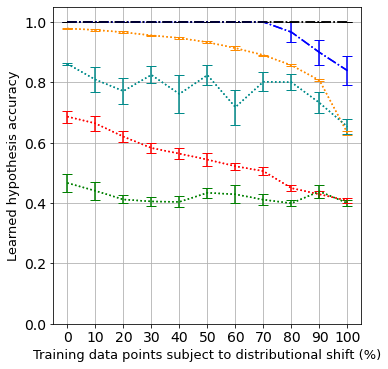

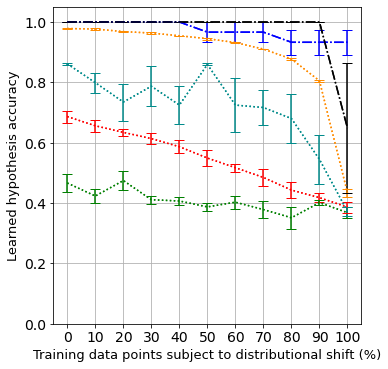

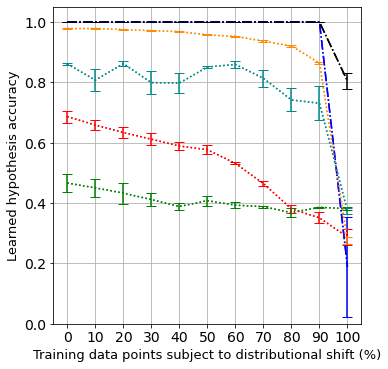

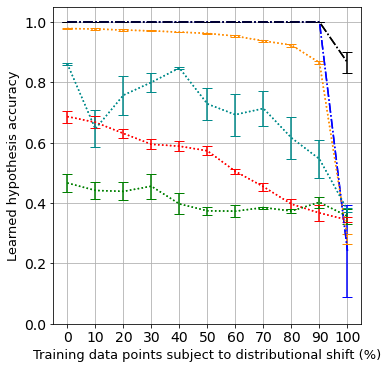

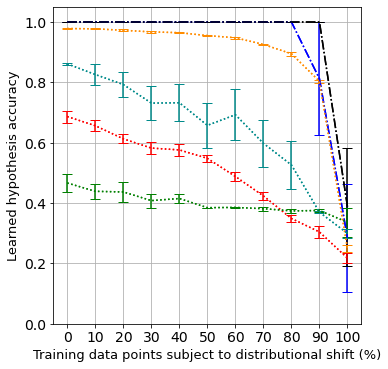

In [41]:
# fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[0, 2])
# f2_ax4 = fig2.add_subplot(spec2[1, 0])
# f2_ax5 = fig2.add_subplot(spec2[1, 1])
# f2_ax6 = fig2.add_subplot(spec2[1, 2])

# axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]

nps_x = [0]+noise_pcts
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', decks[i])
    axes.plot(nps_x, nsl_acc, label = "FFNSL Softmax 104 examples", color="b", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    nsl_acc, nsl_err = get_nsl_results('edl_gen', decks[i])
    axes.plot(nps_x, nsl_acc, label = "FFNSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', decks[i])
    axes.plot(nps_x, rf_acc, label = "Baseline RF 104 examples", color="r", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', decks[i], data_size='large')
    axes.plot(nps_x, rf_acc, label = "Baseline RF 10,400 examples", color="darkorange", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # FCN Small
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i])
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 104 examples", color="g", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # FCN Large
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], data_size='large')
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 10,400 examples", color="darkcyan", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Credal-FOIL
    #     if decks[i] == 'batman_joker':
    #         cf_acc, cf_err = get_credal_foil_results(decks[i])
    #         axes[i].plot(nps_x, cf_acc, label = "Baseline Credal-FOIL 50 examples", color="indigo", linestyle=':')
    #         axes[i].errorbar(nps_x, cf_acc, yerr=cf_err, color="indigo", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', decks[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', decks[i])
#     ax2 = axes.twiny()
    
    axes.set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    NEW_FONT_SIZE = 13
    axes.set_xlabel('Training data points subject to distributional shift (%)', fontsize=NEW_FONT_SIZE)
    axes.set_ylabel('Learned hypothesis accuracy', fontsize=NEW_FONT_SIZE)
    axes.set_ylim([0,1.05])
#     axes[i].set_title(decks[i])
    axes.grid(True)
    
    legend = axes.legend(bbox_to_anchor=(1.05, 1.25), fontsize=9,ncol=3, borderaxespad=0, )

    def export_legend(legend, filename="follow_suit_legend.pdf", expand=[-5,-5,5,5]):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent()
        bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
        bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi="figure", bbox_inches=bbox, format='pdf')
    
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 45))
#     ax2.set_xlabel('ILP ex. with a non-matching ctx/label: Softmax (%)', fontsize=NEW_FONT_SIZE)
#     ax2.set_xlim(axes.get_xlim())
    
#     ax3 = axes.twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 90))
#     ax3.set_xlabel('ILP ex. with a non-matching ctx/label: EDL-GEN (%)', fontsize=NEW_FONT_SIZE)
#     ax3.set_xlim(axes.get_xlim())
    
    if i == 0:
        export_legend(legend)
    axes.get_legend().remove()

    plt.savefig('structured_test_data/'+decks[i]+'_follow_suit_structured_test_data_results.pdf', format='pdf', bbox_inches='tight')
    
# Set legend
# f2_ax6.legend(*axes.get_legend_handles_labels(), loc='center')
# f2_ax6.get_xaxis().set_visible(False)
# f2_ax6.get_yaxis().set_visible(False)
# f2_ax6.set_title('Legend')
# plt.savefig('follow_suit_legend.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('follow_suit_structured_test_data_results.pdf', format='pdf', bbox_inches='tight')
# plt.show()

# Unstructured Test Data - Accuracy

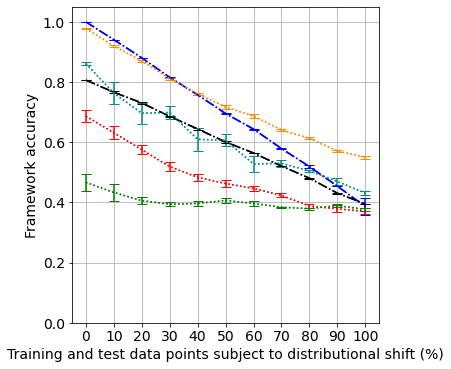

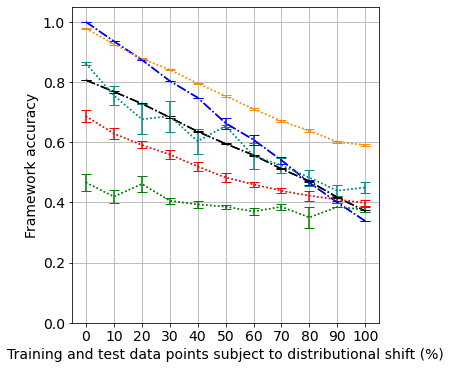

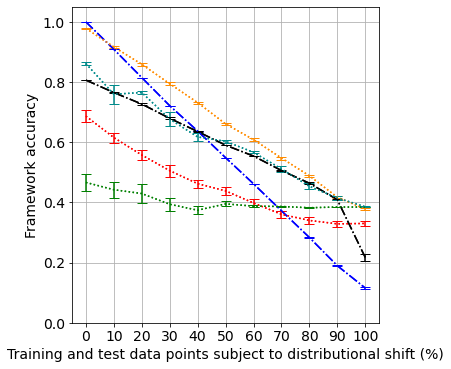

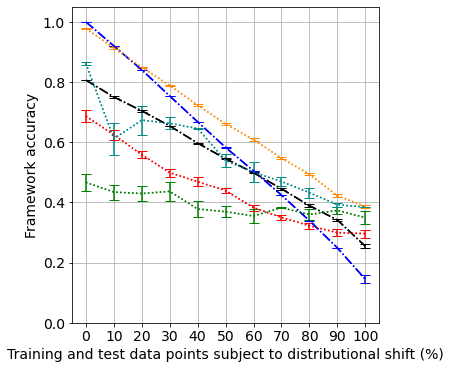

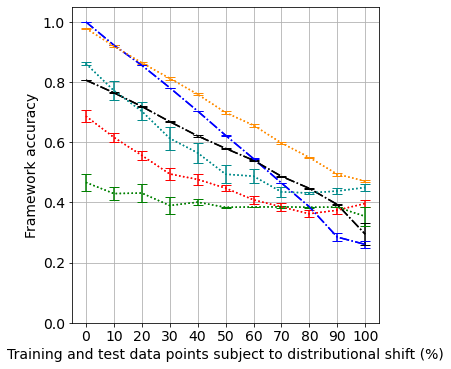

In [20]:
# fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[0, 2])
# f2_ax4 = fig2.add_subplot(spec2[1, 0])
# f2_ax5 = fig2.add_subplot(spec2[1, 1])
# f2_ax6 = fig2.add_subplot(spec2[1, 2])

# axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]

nps_x = [0]+noise_pcts
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', decks[i], unstructured=True)
    axes.plot(nps_x, nsl_acc, label = "NSL Softmax 104 examples", color="b", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', decks[i], unstructured=True)
    axes.plot(nps_x, nsl_acc, label = "NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', decks[i], unstructured=True)
    axes.plot(nps_x, rf_acc, label = "Baseline RF 104 examples", color="r", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', decks[i], data_size='large', unstructured=True)
    axes.plot(nps_x, rf_acc, label = "Baseline RF 10,400 examples", color="darkorange", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # FCN Small
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], unstructured=True)
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 104 examples", color="g", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # FCN Large
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], data_size='large', unstructured=True)
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 10,400 examples", color="darkcyan", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', decks[i], test_set=True)
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', decks[i], test_set=True)
#     ax2 = axes.twiny()
    
    axes.set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes.set_xlabel('Training and test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes.set_ylabel('Framework accuracy', fontsize=FONT_SIZE)
#     axes.set_title(decks[i])
    axes.grid(True)
    axes.set_ylim([0,1.05])
    
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 40))
#     ax2.set_xlabel('Pct examples with incorrect labels post feature extraction (test set): Softmax (%)')
#     ax2.set_xlim(axes.get_xlim())
    
#     ax3 = axes.twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 80))
#     ax3.set_xlabel('Pct examples with incorrect labels post feature extraction (test set): EDL-GEN (%)')
#     ax3.set_xlim(axes.get_xlim())
    plt.savefig('unstructured_test_data/'+decks[i]+'_follow_suit_unstructured_test_data_accuracy_results.pdf', format='pdf', bbox_inches='tight')

    
# Set legend
# f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax6.get_xaxis().set_visible(False)
# f2_ax6.get_yaxis().set_visible(False)
# f2_ax6.set_title('Legend')
#     plt.savefig('unstructured_test_data/'+decks[i]+'_follow_suit_unstructured_test_data_accuracy_results.pdf', format='pdf', bbox_inches='tight')
# plt.show()

# Unstructured Test Data without problog

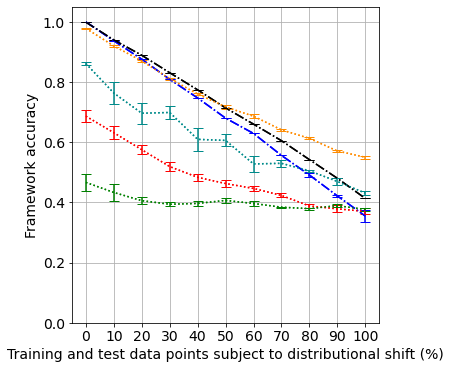

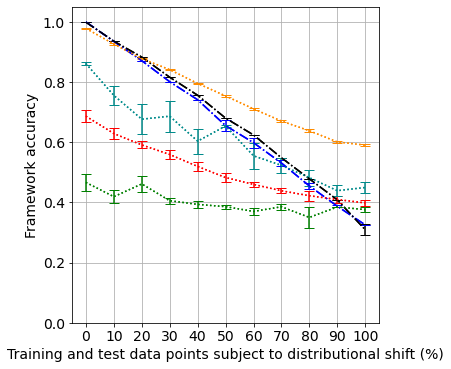

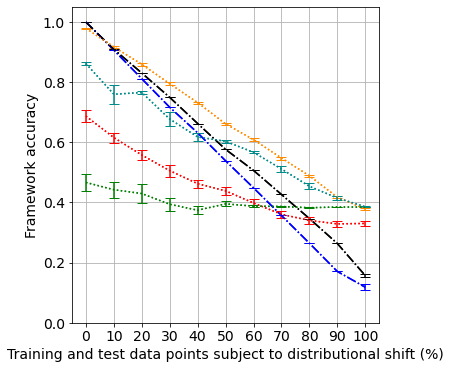

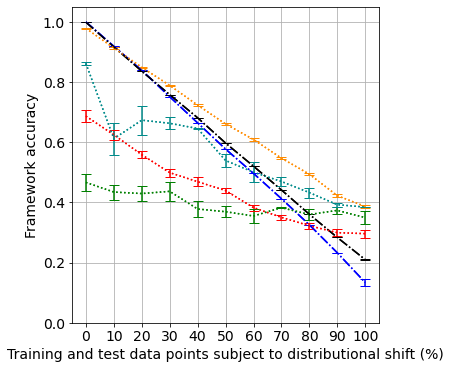

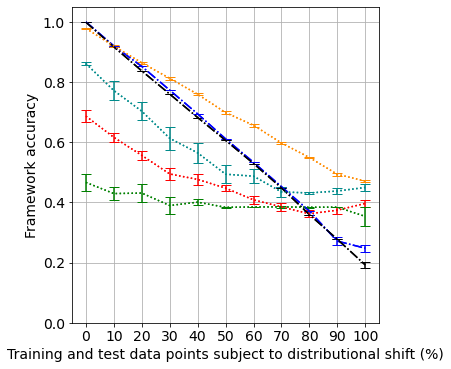

In [32]:
nps_x = [0]+noise_pcts
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', decks[i], unstructured=True, without_problog=True)
    axes.plot(nps_x, nsl_acc, label = "NSL Softmax 104 examples", color="b", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', decks[i], unstructured=True, without_problog=True)
    axes.plot(nps_x, nsl_acc, label = "NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', decks[i], unstructured=True)
    axes.plot(nps_x, rf_acc, label = "Baseline RF 104 examples", color="r", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', decks[i], data_size='large', unstructured=True)
    axes.plot(nps_x, rf_acc, label = "Baseline RF 10,400 examples", color="darkorange", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # FCN Small
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], unstructured=True)
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 104 examples", color="g", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # FCN Large
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], data_size='large', unstructured=True)
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 10,400 examples", color="darkcyan", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    
    axes.set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes.set_xlabel('Training and test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes.set_ylabel('Framework accuracy', fontsize=FONT_SIZE)
#     axes.set_title(decks[i])
    axes.grid(True)
    axes.set_ylim([0,1.05])
    
 
    plt.savefig('unstructured_test_data/'+decks[i]+'_follow_suit_unstructured_test_data_accuracy_without_problog_results.pdf', format='pdf', bbox_inches='tight')



# Unstructured Test Data Brier Score

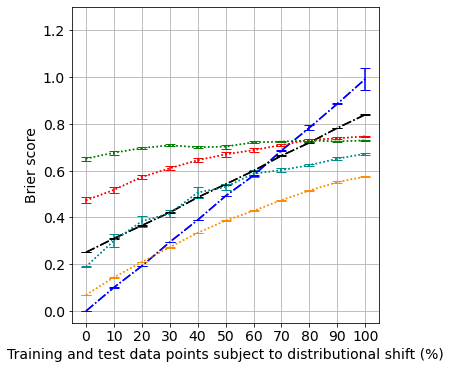

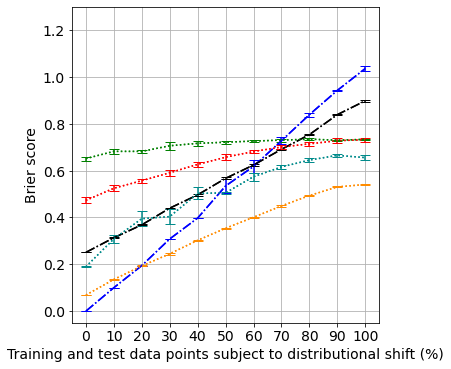

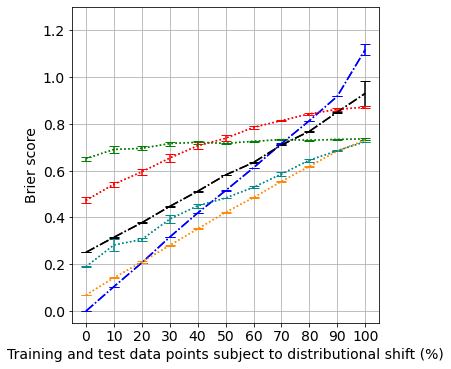

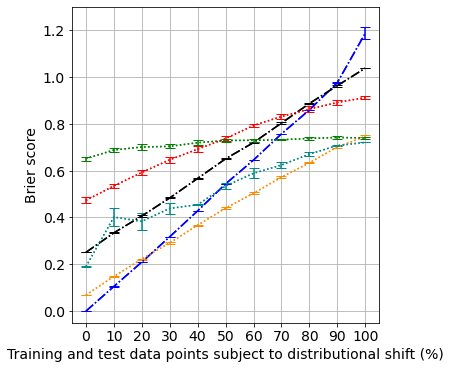

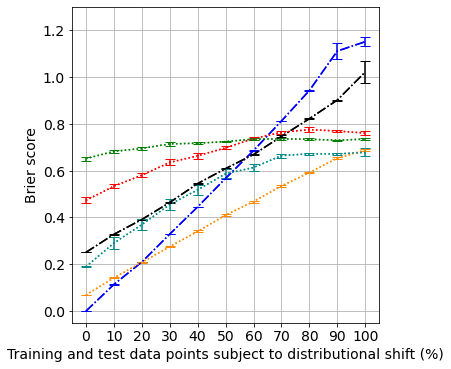

In [18]:
# fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[0, 2])
# f2_ax4 = fig2.add_subplot(spec2[1, 0])
# f2_ax5 = fig2.add_subplot(spec2[1, 1])
# f2_ax6 = fig2.add_subplot(spec2[1, 2])

# axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]

nps_x = [0]+noise_pcts
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', decks[i], unstructured=True, unstruc_acc='brier_score')
    axes.plot(nps_x, nsl_acc, label = "NSL Softmax 104 examples", color="b", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', decks[i], unstructured=True, unstruc_acc='brier_score')
    axes.plot(nps_x, nsl_acc, label = "NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', decks[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes.plot(nps_x, rf_acc, label = "Baseline RF 104 examples", color="r", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', decks[i], data_size='large', unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes.plot(nps_x, rf_acc, label = "Baseline RF 10,400 examples", color="darkorange", linestyle=':')
    axes.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # FCN Small
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 104 examples", color="g", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # FCN Large
    fcn_acc, fcn_err = get_baseline_results('fcn', decks[i], data_size='large', unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes.plot(nps_x, fcn_acc, label = "Baseline FCN 10,400 examples", color="darkcyan", linestyle=':')
    axes.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', decks[i], test_set=True)
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', decks[i], test_set=True)
#     ax2 = axes[i].twiny()
    
    axes.set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes.set_xlabel('Training and test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes.set_ylabel('Brier score', fontsize=FONT_SIZE)
#     axes.set_title(decks[i])
    axes.grid(True)
    axes.set_ylim([-0.05,1.3])
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 40))
#     ax2.set_xlabel('Pct examples with incorrect labels post feature extraction (test set): Softmax (%)')
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 80))
#     ax3.set_xlabel('Pct examples with incorrect labels post feature extraction (test set): EDL-GEN (%)')
#     ax3.set_xlim(axes[i].get_xlim())
    plt.savefig('unstructured_test_data_brier_score/'+decks[i]+'_follow_suit_unstructured_test_data_brier_score_results.pdf', format='pdf', bbox_inches='tight')

    
# Set legend
# f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax6.get_xaxis().set_visible(False)
# f2_ax6.get_yaxis().set_visible(False)
# f2_ax6.set_title('Legend')
# plt.savefig('follow_suit_unstructured_test_data_brier_score_results.pdf', format='pdf', bbox_inches='tight')
# plt.show()